# NumPyの関数群

In [85]:
import numpy as np
from matplotlib import pyplot as plt
import helper.matplotlib
import helper.magics

前述の`ndarray`配列オブジェクトと`ufunc`関数に加えて、NumPyは配列を処理するための多くの関数を提供しています。これらの関数を活用することで、プログラムのロジックを簡素化し、計算速度を向上させることができます。このセクションでは、いくつかの一般的な例を通じて、それらの使用法と注意点を説明します。

## 乱数

このセクションでは以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
| `rand`  | 0から1の間の乱数  | `randn`  | 標準正規分布の乱数  |
| `randint`  | 指定範囲内のランダムな整数  | `normal` | 正規分布 |
| `uniform` | 一様分布 | `poisson` | ポアソン分布 |
| `permutation` | ランダムな順列 | `shuffle` | ランダムに順序をシャッフル |
| `choice` | ランダムにサンプルを抽出 | `seed` | 乱数のシードを設定 |

`numpy.random`モジュールには、乱数に関連する多くの関数が提供されています。後で乱数を使用してさまざまな演算関数をテストするために、まず乱数を生成する方法を見てみましょう：

* `rand()`は0から1の間のランダムな浮動小数点数を生成し、そのすべてのパラメータは生成される配列の形状を指定します。
* `randn()`は標準正規分布の乱数を生成し、パラメータの意味は`rand()`と同じです。
* `randint()`は指定された範囲のランダムな整数を生成し、開始値は含まれますが終了値は含まれません。以下の例では0から9の間の乱数を生成し、その3番目のパラメータは配列の形状を指定します。

In [86]:
from numpy import random as nr

np.set_printoptions(precision=2)  # スペースを節約するため、小数点以下2桁のみ表示
r1 = nr.rand(4, 3)
r2 = nr.randn(4, 3)
r3 = nr.randint(0, 10, (4, 3))

%C r1; r2; r3

         r1                      r2                 r3    
--------------------  -----------------------  -----------
[[0.29, 0.16, 0.93],  [[-0.7 , -0.33, -0.39],  [[5, 7, 8],
 [0.81, 0.63, 0.87],   [-1.46,  0.3 ,  0.26],   [3, 0, 0],
 [0.8 , 0.19, 0.89],   [ 0.01, -0.23, -1.42],   [9, 3, 6],
 [0.54, 0.81, 0.9 ]]   [-0.42, -0.34, -0.8 ]]   [1, 2, 0]]


`random`モジュールは、特定の確率分布に従う乱数を生成する多くの関数を提供しています。それらの最後の`size`パラメータは、出力配列の形状を指定します。他のパラメータは分布関数のパラメータです。例えば：

* `normal()`：正規分布、最初の2つのパラメータは平均と標準偏差です。
* `uniform()`：一様分布、最初の2つのパラメータは区間の開始値と終了値です。
* `poisson()`：ポアソン分布、最初のパラメータは$\lambda$係数を指定し、単位時間（または単位面積）内のランダムなイベントの平均発生率を表します。ポアソン分布は離散分布であるため、出力される配列は整数配列です。

In [87]:
r1 = nr.normal(100, 10, (4, 3))
r2 = nr.uniform(10, 20, (4, 3))
r3 = nr.poisson(2.0, (4, 3))

%C r1; r2; r3

            r1                         r2                 r3    
--------------------------  -----------------------  -----------
[[ 95.58,  99.16, 112.37],  [[18.03, 14.7 , 19.83],  [[3, 4, 2],
 [ 85.74, 103.38, 119.75],   [13.99, 18.16, 17.98],   [2, 2, 4],
 [119.65,  80.6 ,  92.37],   [11.51, 15.08, 16.96],   [4, 6, 3],
 [101.69,  86.78,  93.32]]   [18.58, 13.26, 12.2 ]]   [3, 0, 1]]


`permutation()`は、ランダムな順列を生成するために使用できます。パラメータが整数`n`の場合、$[0, n)$の範囲のn個の整数のランダムな順列を返し、パラメータがシーケンスの場合、ランダムに並べ替えられたシーケンスを返します：

In [88]:
a = np.array([1, 10, 20, 30, 40])
print(nr.permutation(10))
print(nr.permutation(a))

[1 4 8 3 5 0 2 6 9 7]
[ 1 30 10 20 40]


`permutation()`は新しい配列を返しますが、`shuffle()`は直接パラメータの配列の順序をシャッフルします：

In [89]:
nr.shuffle(a)
a

array([30,  1, 10, 40, 20])

`choice()`は指定されたサンプルからランダムに抽出します：

* `size`パラメータは出力配列の形状を指定します。
* `replace`パラメータが`True`の場合、重複を許して抽出し、`False`の場合、重複を許さずに抽出します。デフォルト値は`True`です。したがって、以下の例では、`c1`には重複する値が含まれる可能性がありますが、`c2`の各値は異なります。
* `p`パラメータは各要素の抽出確率を指定します。指定しない場合、すべての要素が同じ確率で抽出されます。以下の例では、値が大きい要素ほど抽出される確率が高く、`c3`には大きな値の要素が多く含まれます。

In [90]:
a = np.arange(10, 25, dtype=float)
c1 = nr.choice(a, size=(4, 3))
c2 = nr.choice(a, size=(4, 3), replace=False)
c3 = nr.choice(a, size=(4, 3), p=a / np.sum(a))

%C c1; c2; c3

        c1                 c2                 c3       
-----------------  -----------------  -----------------
[[23., 10., 21.],  [[20., 11., 13.],  [[23., 16., 17.],
 [24., 10., 14.],   [19., 16., 24.],   [23., 16., 13.],
 [21., 22., 12.],   [17., 22., 18.],   [19., 24., 21.],
 [13., 12., 10.]]   [12., 15., 14.]]   [20., 12., 20.]]


毎回同じ乱数を再現するために、`seed()`関数を使用して乱数のシードを指定できます。以下の例では、`r3`と`r4`を計算する前に、42をシードとして使用しているため、得られる乱数配列は同じです：

In [91]:
r1 = nr.randint(0, 100, 3)
r2 = nr.randint(0, 100, 3)
nr.seed(42)
r3 = nr.randint(0, 100, 3)
nr.seed(42)
r4 = nr.randint(0, 100, 3)
%C r1; r2; r3; r4

     r1            r2            r3            r4     
------------  ------------  ------------  ------------
[85, 22, 65]  [26,  1, 89]  [51, 92, 14]  [51, 92, 14]


## 合計、平均、分散

このセクションでは以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
|`sum`|合計|`mean`|平均|
|`average`|加重平均|`std`|標準偏差|
|`var`|分散|`product`|積|

`sum()`は配列要素の合計を計算し、リストやタプルなどの配列に似たシーケンスに対しても合計を計算できます。配列が多次元の場合、配列内のすべての要素の合計を計算します。ここでは、`random.randint()`モジュールの関数を使用してランダムな整数配列を作成します。

In [92]:
np.random.seed(42)
a = np.random.randint(0, 10, size=(4, 5))
%C a; np.sum(a)

        a           np.sum(a)  
-----------------  ------------
[[6, 3, 7, 4, 6],  np.int64(96)
 [9, 2, 6, 7, 4],              
 [3, 7, 7, 2, 5],              
 [4, 1, 7, 5, 1]]              


`axis`パラメータを指定すると、指定された軸に沿って合計演算が行われます。上の例では、配列`a`の第0軸の長さは4、第1軸の長さは5です。`axis`パラメータが1の場合、各行の5つの数値の合計を計算し、結果は長さ4の1次元配列です。`axis`パラメータが0の場合、各列の4つの数値の合計を計算し、結果は長さ5の1次元配列です。つまり、結果の配列の形状は、元の配列の形状から第`axis`要素を取り除いたものです：

In [93]:
%C np.sum(a, axis=1); np.sum(a, axis=0)

np.sum(a, axis=1)   np.sum(a, axis=0)  
-----------------  --------------------
[26, 28, 24, 18]   [22, 13, 27, 18, 16]


`axis`パラメータが軸のシーケンスの場合、指定されたすべての軸に対して合計演算が行われます。例えば、以下のプログラムは形状が`(2,3,4)`の3次元配列の第0、2軸に対して合計を計算し、結果は形状が`(3,)`の配列になります。配列のすべての要素が1であるため、合計の結果はすべて8です：

In [94]:
np.sum(np.ones((2, 3, 4)), axis=(0, 2))

array([8., 8., 8.])

時には、元の配列の次元を維持したい場合があります。その場合、`keepdims`パラメータを`True`に設定できます：

In [95]:
%C np.sum(a, 1, keepdims=True); np.sum(a, 0, keepdims=True)

np.sum(a, 1, keepdims=True)  np.sum(a, 0, keepdims=True)
---------------------------  ---------------------------
[[26],                       [[22, 13, 27, 18, 16]]     
 [28],                                                  
 [24],                                                  
 [18]]                                                  


`sum()`はデフォルトで配列の要素型と同じ累積変数を使用して計算します。要素型が整数の場合、システムのデフォルトの整数型が累積変数として使用されます。例えば、32ビットシステムでは32ビット整数が累積変数として使用されます。したがって、整数配列を累積する場合、オーバーフローが発生する可能性があります。つまり、配列要素の合計が累積変数の範囲を超える場合です。以下のプログラムは、配列`a`の各要素がその行の合計に占める割合を計算します。`sum()`関数を呼び出す際に：

* `dtype`パラメータを`float`に設定し、結果が浮動小数点配列になるようにします。これにより、整数の除算演算を回避できます。
* `keepdims`パラメータをTrueに設定し、`sum()`の結果の形状が`(4, 1)`になるようにします。これにより、元の配列とのブロードキャスト演算が可能になります。

In [96]:
pa = a / np.sum(a, 1, dtype=float, keepdims=True) * 100
%C 2 pa; pa.sum(1, keepdims=True)

                  pa                   pa.sum(1, keepdims=True)
-------------------------------------  ------------------------
[[23.08, 11.54, 26.92, 15.38, 23.08],  [[100.],                
 [32.14,  7.14, 21.43, 25.  , 14.29],   [100.],                
 [12.5 , 29.17, 29.17,  8.33, 20.83],   [100.],                
 [22.22,  5.56, 38.89, 27.78,  5.56]]   [100.]]                


非常に大きな単精度浮動小数点型の配列を計算する場合、精度が不足する場合があります。その場合も、`dtype`パラメータを使用して累積変数の型を指定できます。以下の例では、すべての要素が1.1の単精度配列の合計を計算し、単精度累積変数と倍精度累積変数の計算結果を比較します：

In [97]:
np.set_printoptions(precision=8)
b = np.full(1000000, 1.1, dtype=np.float32)  # 非常に大きな単精度浮動小数点配列を作成
b  # 1.1は浮動小数点数で正確に表現できないため、いくつかの誤差が存在します

array([1.1, 1.1, 1.1, ..., 1.1, 1.1, 1.1], dtype=float32)

単精度累積変数を使用して累積計算を行うと、誤差が大きくなりますが、倍精度浮動小数点数を使用するとより正確な結果が得られます：

In [98]:
%C np.sum(b); np.sum(b, dtype=np.double)

      np.sum(b)          np.sum(b, dtype=np.double) 
---------------------  -----------------------------
np.float32(1099999.2)  np.float64(1100000.023841858)


上記の例では、合計の結果を新しい配列に保存しますが、結果を直接別の配列に保存したい場合は、`ufunc`関数と同様に`out`パラメータを使用して出力配列を指定できます。その形状は結果配列の形状と同じである必要があります。

`mean()`は配列の平均値を計算し、そのパラメータは`sum()`と同じです。`sum()`とは異なり、整数配列に対しては倍精度浮動小数点数を使用して計算し、他の型の配列に対しては配列の要素型と同じ累積変数を使用して計算します：

In [99]:
np.mean(a, axis=1)  # 整数配列は倍精度浮動小数点数を使用して計算されます

array([5.2, 5.6, 4.8, 3.6])

In [100]:
%C np.mean(b); np.mean(b, dtype=np.double)

      np.mean(b)        np.mean(b, dtype=np.double) 
---------------------  -----------------------------
np.float32(1.0999993)  np.float64(1.100000023841858)


さらに、`average()`も配列の平均を計算できます。`out`と`dtype`パラメータはありませんが、各要素の重みを指定する`weights`パラメータがあり、加重平均を計算するために使用できます。例えば、3つのクラスがあり、`number`配列には各クラスの人数が保存され、`score`配列には各クラスの平均点が保存されています。以下では、すべてのクラスの加重平均点を計算して、学年全体の平均点を求めます：

In [101]:
score = np.array([83, 72, 79])
number = np.array([20, 15, 30])
print(np.average(score, weights=number))

78.61538461538461


これは以下の計算と同等です：

In [102]:
print(np.sum(score * number) / np.sum(number, dtype=float))

78.61538461538461


`std()`と`var()`はそれぞれ配列の標準偏差と分散を計算し、`axis`、`out`、`dtype`、`keepdims`などのパラメータがあります。分散には2つの定義があります：偏りのある標本分散（biased sample variance）と偏りのない標本分散（unbiased sample variance）。偏りのある標本分散の計算式は以下の通りです：

$$s_n^2 = \frac{1}{n} \sum_{i=1}^n\left(y_i - \overline{y} \right)^ 2$$

一方、偏りのない標本分散の計算式は以下の通りです：

$$s^2 = \frac{1}{n-1} \sum_{i=1}^n\left(y_i - \overline{y} \right)^ 2$$

`ddof`パラメータが0の場合、偏りのある標本分散を計算し、`ddof`が1の場合、偏りのない標本分散を計算します。デフォルト値は0です。以下では、これらの2つの分散の違いをプログラムで示します。

まず、標準偏差が2.0、分散が4.0の正規分布の乱数配列を生成します。母集団の分散が4.0であると考えることができます。母集団からランダムに10個のサンプルを抽出し、これらのサンプルの2つの分散をそれぞれ計算します。ここでは、2次元配列を使用してこの操作を10000回繰り返します。そして、すべての分散の期待値を計算します。

In [103]:
a = nr.normal(0, 2.0, (100000, 10))
v1 = np.var(a, axis=1, ddof=0)  # ddof=0は省略可能
v2 = np.var(a, axis=1, ddof=1)
%C np.mean(v1); np.mean(v2)

         np.mean(v1)                     np.mean(v2)         
------------------------------  -----------------------------
np.float64(3.6008566906846693)  np.float64(4.000951878538522)


偏りのない標本分散の期待値は母集団の分散4.0に近く、偏りのある標本分散は4.0より少し小さいことがわかります。

偏りのある標本分散は、正規分布の確率変数の最尤推定値です。n個の乱数を含むサンプルがあり、それらが正規分布に従っていることがわかっている場合、そのサンプルを使用して正規分布の確率密度関数のパラメータを推定できます。推定された正規分布のパラメータのセットが与えられたサンプルに最も適合する場合、それを最尤推定と呼びます。

正規分布の確率密度関数の定義は以下の通りで、$\mu$は平均、$\sigma^2$は分散を表します：

$$f(x\mid \mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(x-\mu)^2}{2\sigma^2}}$$

最尤推定とは、以下の積が最大になるようなパラメータのセットを見つけることです。ここで、$x_i$はサンプル内の値です：

$$f(x_1) f(x_2) \cdots f(x_n)$$

専門用語は常に理解しにくいものです。以下では、プログラムを使用してこれを検証します。

In [104]:
def normal_pdf(mean, var, x):
    return 1 / np.sqrt(2 * np.pi * var) * np.exp(-((x - mean) ** 2) / (2 * var))


nr.seed(42)
data = nr.normal(0, 2.0, size=10)  #❶
mean, var = np.mean(data), np.var(data)  #❷
var_range = np.linspace(max(var - 4, 0.1), var + 4, 100)  #❸

p = normal_pdf(mean, var_range[:, None], data)  #❹
p = np.prod(p, axis=1)  #❺

`normal_pdf()`は正規分布の確率密度を計算する関数です。❶10個の正規分布に従う乱数を生成し、❷その最大尤度推定のパラメータを計算します。❸最大尤度推定の分散を中心として、一連の分散値を生成します。

❹正規分布の確率密度関数を使用して、各サンプルと各分散に対応する確率密度を計算します。ブロードキャスト演算を使用しているため、得られる結果`p`は2次元配列であり、その第0軸は`var_range`内の各分散に対応し、第1軸は`data`内の各要素に対応します。❺`p`の第1軸に沿ってすべての確率密度の積を求めます。`prod()`と`sum()`の使い方は似ており、配列のすべての要素の積を計算するために使用されます。

以下に、`var_range`内の各分散に対応する尤度推定値をプロットし、偏りサンプル分散を示す垂直線を引きます。次のグラフから、偏りサンプル分散が尤度推定曲線の最大値に位置していることがわかります。

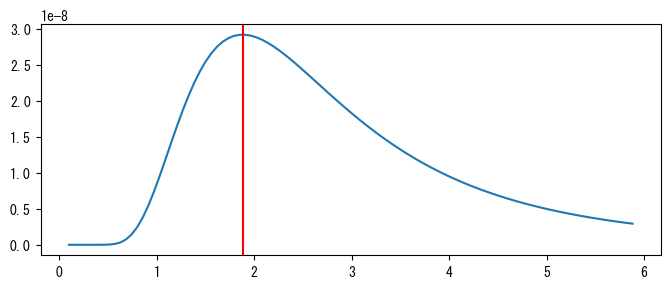

In [105]:
plt.figure(figsize=(8, 3))
plt.plot(var_range, p)
plt.axvline(var, 0, 1, c="r")
plt.show()

## ソートと大きさ

このセクションでは以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
| `min`  | 最小値  | `max`  | 最大値  |
| `minimum`  | 二項最小値  | `maximum`  | 二項最大値  |
| `ptp`  | 最大値と最小値の差  | `argmin` | 最小値のインデックス |
| `argmax` | 最大値のインデックス | `unravel_index` | 一次元インデックスを多次元インデックスに変換 |
| `sort` | 配列のソート | `argsort` | 配列のソートインデックスを計算 |
| `lexsort` | 複数列ソート | `partition` | 上位`k`個を高速に計算 |
| `argpartition` | 上位`k`個のインデックス | `median` | 中央値 |
| `percentile` | パーセンタイル | `searchsorted` | 二分探索 |


`min()`と`max()`を使用して、配列の最小値と最大値を計算できます。これらには`axis`、`out`、`keepdims`などのパラメータがあります。これらのパラメータの使用方法は`sum()`とほぼ同じですが、`axis`パラメータはシーケンスをサポートしていません。また、`ptp()`は最大値と最小値の差を計算し、`axis`と`out`パラメータを持ちます。ここではこれ以上例を挙げませんので、関数のドキュメントを参照してください。`minimum()`と`maximum()`は、2つの配列の対応するインデックスの要素を比較し、返される配列の形状は2つのパラメータ配列のブロードキャスト後の形状です。

In [106]:
a = np.array([1, 3, 5, 7])
b = np.array([2, 4, 6])
np.maximum(a[None, :], b[:, None])

array([[2, 3, 5, 7],
       [4, 4, 5, 7],
       [6, 6, 6, 7]])

`argmax()`と`argmin()`を使用して、最大値と最小値のインデックスを求めることができます。`axis`パラメータを指定しない場合、平坦化された配列のインデックスが返されます。例えば、以下のプログラムは`a`の中で最大値のインデックスを見つけます。複数の最大値がある場合、最初の最大値のインデックスが得られます：

In [107]:
np.random.seed(42)
a = np.random.randint(0, 10, size=(4, 5))
max_pos = np.argmax(a)
max_pos

np.int64(5)

次に、`a`の平坦化された配列の中で、インデックスが`max_pos`の要素を見てみましょう：

In [108]:
%C a.ravel()[max_pos]; np.max(a)

a.ravel()[max_pos]   np.max(a) 
------------------  -----------
np.int32(9)         np.int32(9)


`unravel_index()`を使用して、一次元配列のインデックスを多次元配列のインデックスに変換できます。最初のパラメータは一次元配列のインデックスで、2番目のパラメータは多次元配列の形状です：

In [109]:
idx = np.unravel_index(max_pos, a.shape)
%C idx; a[idx]

           idx                 a[idx]  
--------------------------  -----------
(np.int64(1), np.int64(0))  np.int32(9)


`axis`パラメータを使用する場合、指定された軸に沿って最大値のインデックスを計算できます。例えば、以下の結果は、配列`a`の中で0行目の最大値のインデックスが2で、1行目の最大値のインデックスが0であることを示しています：

In [110]:
idx = np.argmax(a, axis=1)
idx

array([2, 0, 1, 2])

以下の文を使用して、`idx`を使用して各行の最大値を選択できます：

In [111]:
a[np.arange(a.shape[0]), idx]

array([7, 9, 7, 7], dtype=int32)

配列の`sort()`メソッドは配列をソートし、配列の内容を変更します。一方、`sort()`関数は新しい配列を返し、元の配列を変更しません。これらの`axis`のデフォルト値は-1で、配列の最終軸に沿ってソートされます。`sort()`関数の`axis`パラメータは`None`に設定でき、その場合、平坦化された後にソートされた新しい配列が得られます。以下の例では、`np.sort(a)`は`a`の各行の値をソートし、`np.sort(a, axis=0)`は配列`a`の各列の値をソートします。

In [112]:
%C np.sort(a); np.sort(a, axis=0)

    np.sort(a)     np.sort(a, axis=0)
-----------------  ------------------
[[3, 4, 6, 6, 7],  [[3, 1, 6, 2, 1], 
 [2, 4, 6, 7, 9],   [4, 2, 7, 4, 4], 
 [2, 3, 5, 7, 7],   [6, 3, 7, 5, 5], 
 [1, 1, 4, 5, 7]]   [9, 7, 7, 7, 6]] 


`argsort()`は配列のソートインデックスを返し、`axis`パラメータのデフォルト値は-1です：

In [113]:
sort_axis1 = np.argsort(a)
sort_axis0 = np.argsort(a, axis=0)
%C sort_axis1; sort_axis0

    sort_axis1         sort_axis0   
-----------------  -----------------
[[1, 3, 0, 4, 2],  [[2, 3, 1, 2, 3],
 [1, 4, 2, 3, 0],   [3, 1, 0, 0, 1],
 [3, 0, 4, 1, 2],   [0, 0, 2, 3, 2],
 [1, 4, 0, 3, 2]]   [1, 2, 3, 1, 0]]


`sort_axis0`と`sort_axis1`を使用してソートされた配列、つまり`np.sort(a)`の結果を計算するためには、非ソート軸のインデックスを生成する必要があります。以下では、`ogrid`オブジェクトを使用して第0軸と第1軸のインデックス`axis0`と`axis1`を生成します：

In [114]:
axis0, axis1 = np.ogrid[: a.shape[0], : a.shape[1]]

次に、これらのインデックス配列を使用してソートされた配列を取得します：

In [115]:
%C a[axis0, sort_axis1]; a[sort_axis0, axis1]

a[axis0, sort_axis1]  a[sort_axis0, axis1]
--------------------  --------------------
[[3, 4, 6, 6, 7],     [[3, 1, 6, 2, 1],   
 [2, 4, 6, 7, 9],      [4, 2, 7, 4, 4],   
 [2, 3, 5, 7, 7],      [6, 3, 7, 5, 5],   
 [1, 1, 4, 5, 7]]      [9, 7, 7, 7, 6]]   


この方法を使用して、2つの関連する配列をソートできます。つまり、配列`a`からソートインデックス配列を生成し、それを使用して配列`b`をソートします。ソート関連の関数やメソッドは、`kind`パラメータを使用してソートアルゴリズムを指定でき、構造体配列の場合は`order`パラメータを使用してソートに使用するフィールドを指定できます。

`lexsort()`はExcelの複数列ソートに似ています。そのパラメータは形状が`(k, N)`の配列、または`k`個の長さ`N`の配列のシーケンスで、Excelの`N`行`k`列のテーブルと考えることができます。`lexsort()`はソートインデックスを返しますが、データの最後の列がソートの主キーであることに注意してください。以下の例では、「名前-年齢」の順にデータをソートします：

In [116]:
names = ["zhang", "wang", "li", "wang", "zhang"]
ages = [37, 33, 32, 31, 36]
idx = np.lexsort([ages, names])
sorted_data = np.array(list(zip(names, ages)), "O")[idx]
%C idx; sorted_data

      idx          sorted_data  
---------------  ---------------
[2, 3, 1, 4, 0]  [['li', 32],   
                  ['wang', 31], 
                  ['wang', 33], 
                  ['zhang', 36],
                  ['zhang', 37]]


`N`行`k`列の配列を第1列を主キーとしてソートする必要がある場合、まずスライスインデックス`[::-1]`を使用してデータの第1軸を反転し、その後転置して`lexsort()`でソートできます：

In [117]:
b = np.random.randint(0, 10, (5, 3))
%C b; b[np.lexsort(b[:, ::-1].T)]

     b       b[np.lexsort(b[:, ::-1].T)]
-----------  ---------------------------
[[4, 0, 9],  [[3, 8, 2],                
 [5, 8, 0],   [4, 0, 9],                
 [9, 2, 6],   [4, 2, 6],                
 [3, 8, 2],   [5, 8, 0],                
 [4, 2, 6]]   [9, 2, 6]]                


`partition()`と`argpartition()`は配列を分割し、ソート後の上位`k`個の要素を迅速に見つけることができます。これは配列全体を完全にソートする必要がないため、`sort()`を呼び出してから上位`k`個の要素を取得するよりもはるかに高速です。以下では、10万個の乱数から上位5個の最小値を探します。`partition()`で得られた上位5個の値は小さい順に並んでいないことに注意してください。必要であれば、`sort()`を呼び出してこれら5つの数をソートできます：

In [118]:
r = np.random.randint(10, 1000000, 100000)
%C np.sort(r)[:5]; np.partition(r, 5)[:5]

   np.sort(r)[:5]     np.partition(r, 5)[:5]
--------------------  ----------------------
[15, 23, 25, 37, 47]  [15, 23, 25, 37, 47]  


以下に、`%timeit`を使用して`sort()`と`partition()`の実行速度をテストします：

In [119]:
%timeit np.sort(r)[:5]
%timeit np.sort(np.partition(r, 5)[:5])

1.06 ms ± 37.5 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
122 μs ± 18.7 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


`median()`を使用して配列の中央値を取得できます。つまり、配列をソートした後、配列の中央位置にある値です。長さが偶数の場合、中央の2つの数の平均値が得られます。また、`axis`と`out`パラメータを指定することもできます：

In [120]:
np.median(a, axis=1)

array([6., 6., 5., 4.])

`percentile()`はパーセンタイルを計算するために使用されます。つまり、値を小さい順に並べ、$p\%$の位置にある値を計算します。以下のプログラムは、標準正規分布の乱数の絶対値が$68.3\%$、$95.4\%$、および$99.7\%$の位置にあるパーセンタイルを計算します。これらは1倍、2倍、および3倍の標準偏差にほぼ等しいはずです：

In [121]:
r = np.abs(np.random.randn(100000))
np.percentile(r, [68.3, 95.4, 99.7])

array([1.00029686, 1.99473003, 2.9614485 ])

配列の要素が小さい順に並んでいる場合、`searchsorted()`を使用して配列内で二分探索を行うことができます。以下の例では、`a`はすでにソートされたリストで、`v`は検索する数値のリストです。`searchsorted()`はインデックス配列を返し、`v`の対応する要素を`a`に挿入する位置を返します。これにより、データの昇順が維持されます。`v`の要素が`a`に存在する場合、`side`パラメータを使用して最左端のインデックスまたは最右端のインデックスを返すことができます。以下の例では、16を`a`のインデックス3、4、5の位置に挿入しても昇順が維持されます。`side`パラメータがデフォルト値`"left"`の場合、3が返され、`"right"`の場合、5が返されます。

In [122]:
a = [2, 4, 8, 16, 16, 32]
v = [1, 5, 33, 16]
%C np.searchsorted(a, v); np.searchsorted(a, v, side="right")

np.searchsorted(a, v)  np.searchsorted(a, v, side="right")
---------------------  -----------------------------------
[0, 2, 6, 3]           [0, 2, 6, 5]                       


`searchsorted()`は、2つの配列内で同じ要素を検索するために使用できます。以下は、より複雑な例です：`x`と`y`という2つの一次元配列があり、`y`の各要素が`x`内にあるインデックスを見つけます。存在しない場合、インデックスは-1に設定されます。

In [123]:
x = np.array([3, 5, 7, 1, 9, 8, 6, 10])
y = np.array([2, 1, 5, 10, 100, 6])


def get_index_searchsorted(x, y):
    index = np.argsort(x)  #❶
    sorted_x = x[index]  #❷
    sorted_index = np.searchsorted(sorted_x, y)  #❸
    yindex = np.take(index, sorted_index, mode="clip")  #❹
    mask = x[yindex] != y  #❺
    yindex[mask] = -1
    return yindex


get_index_searchsorted(x, y)

array([-1,  3,  1,  7, -1,  6])

❶`x`が昇順に並んでいないため、まず`argsort()`を呼び出して昇順ソートのインデックス`index`を取得します。❷`index`を使用して、`x`をソートした`sorted_x`を取得します。❸`searchsorted()`を使用して、`sorted_x`内で`y`の各要素に対応するインデックス`sorted_index`を検索します。

❹検索する値が`x`の最大値を超える場合、インデックスが範囲外になる可能性があるため、ここで`take()`関数を呼び出します。`take(index, sorted_index)`は`index[sorted_index]`と同じ意味ですが、インデックスが範囲外の場合に対処できます。`mode`パラメータを`"clip"`に設定することで、インデックスを`0`から`len(x)-1`の間に制限します。

❺`yindex`を使用して`x`の要素を取得し、`y`と比較します。値が同じ場合、その要素が`x`に存在することを示し、そうでない場合は存在しないことを示します。

このアルゴリズムは少し複雑ですが、NumPyが提供する配列操作関数を利用しているため、辞書を使用した純粋なPythonプログラムよりも高速に動作します。以下では、2つの大きな配列を使用して処理速度をテストします。公平な比較のために、`tolist()`メソッドを呼び出して配列をリストに変換します：

In [124]:
x = np.random.permutation(1000)[:100]
y = np.random.randint(0, 1000, 2000)
xl, yl = x.tolist(), y.tolist()


def get_index_dict(x, y):
    idx_map = {v: i for i, v in enumerate(x)}
    yindex = [idx_map.get(v, -1) for v in y]
    return yindex


yindex1 = get_index_searchsorted(x, y)
yindex2 = get_index_dict(xl, yl)
print(np.all(yindex1 == yindex2))

%timeit get_index_searchsorted(x, y)
%timeit get_index_dict(xl, yl)

True
140 μs ± 5.4 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
200 μs ± 5.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 統計関数

この節では以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
| `unique`  | 重複要素を除去  | `bincount`  | 整数配列の要素をカウント  |
| `histogram`  | 1次元ヒストグラム統計  | `digitze` | 離散化 |

`unique()`は、引数の配列内のすべての異なる値を返し、小さい順に並べ替えます。2つのオプション引数があります：

* `return_index`：`True`の場合、元の配列内のインデックスも返します。
* `return_inverse`：`True`の場合、元の配列を再構築するためのインデックス配列を返します。

以下に、`unique()`の使用例をいくつか紹介します。まず、`randint()`を使用して、0から9の範囲内の10個の要素を持つランダムな整数配列を作成します。`unique(a)`を使用すると、配列`a`内のすべての整数を見つけ、昇順に並べ替えることができます：

In [125]:
np.random.seed(42)
a = np.random.randint(0, 8, 10)
%C a; np.unique(a)

              a                    np.unique(a)   
------------------------------  ------------------
[6, 3, 4, 6, 2, 7, 4, 4, 6, 1]  [1, 2, 3, 4, 6, 7]


引数`return_index`が`True`の場合、2つの配列が返されます。2番目の配列は、最初の配列の元の配列内のインデックスです。以下の例では、配列`index`は配列`x`の各要素が配列`a`内にあるインデックスを保持しています：

In [126]:
x, index = np.unique(a, return_index=True)
%C x; index; a[index]

        x                 index              a[index]     
------------------  ------------------  ------------------
[1, 2, 3, 4, 6, 7]  [9, 4, 1, 2, 0, 5]  [1, 2, 3, 4, 6, 7]


引数`return_inverse`が`True`の場合、返される2番目の配列は、元の配列`a`の各要素が配列`x`内にあるインデックスです：

In [127]:
x, rindex = np.unique(a, return_inverse=True)
%C rindex; x[rindex]

            rindex                        x[rindex]           
------------------------------  ------------------------------
[4, 2, 3, 4, 1, 5, 3, 3, 4, 0]  [6, 3, 4, 6, 2, 7, 4, 4, 6, 1]


`bincount()`は、整数配列内の各要素の出現回数をカウントします。配列内のすべての要素が非負である必要があります。返される配列の第`i`要素の値は、整数`i`の出現回数を表します。

In [128]:
np.bincount(a)

array([0, 1, 1, 1, 3, 0, 3, 1])

上記の結果から、配列`a`には1が1回、2が1回、3が1回、4が3回、6が3回、7が1回出現し、0や5などの数は配列`a`に出現していないことがわかります。

`weights`パラメータを使用して、各数に対応する重みを指定できます。`weights`パラメータを指定すると、`bincount(x, weights=w)`は配列`x`内の各整数に対応する`w`内の重みの合計を返します。言葉で説明するのは難しいので、以下の例を見てみましょう：

In [129]:
x = np.array([0, 1, 2, 2, 1, 1, 0])
w = np.array([0.1, 0.3, 0.2, 0.4, 0.5, 0.8, 1.2])
np.bincount(x, w)

array([1.3, 1.6, 0.6])

上記の結果では、1.3は配列`x`内の0に対応する`w`内の要素（0.1と1.2）の合計、1.6は1に対応する`w`内の要素（0.3、0.5、0.8）の合計、0.6は2に対応する`w`内の要素（0.2と0.4）の合計です。平均値を求めるには、合計結果を回数で割ります：

In [130]:
np.bincount(x, w) / np.bincount(x)

array([0.65      , 0.53333333, 0.3       ])

`histogram()`は1次元配列のヒストグラム統計を行います。そのパラメータリストは以下の通りです：

    histogram(a, bins=10, range=None, weights=None, density=False)
    
ここで、`a`は統計対象のデータを保持する配列、`bins`は統計範囲の区間数を指定します。`range`は長さ2のタプルで、統計範囲の最小値と最大値を表します。デフォルト値は`None`で、データの範囲によって決定されます。`density`パラメータが`False`の場合、関数は`a`内のデータが各区間に含まれる数を返し、`True`の場合は各区間の確率密度を返します。`weights`パラメータは`bincount()`と同様です。

`histogram()`は2つの1次元配列`hist`と`bin_edges`を返します。最初の配列は各区間の統計結果で、2番目の配列の長さは`len(hist) + 1`で、隣接する2つの値が統計区間を構成します。以下の例を見てみましょう：

In [131]:
a = np.random.rand(100)
np.histogram(a, bins=5, range=(0, 1))

(array([28, 18, 17, 19, 18]), array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]))

まず、0から1の範囲内の100個の要素を持つ1次元ランダム配列`a`を作成します。次に、`histogram()`を使用して配列`a`内のデータのヒストグラム統計を行います。結果は、0から0.2の間に28個の要素、0.2から0.4の間に18個の要素があることを示しています。読者は`rand()`を使用してより大きなランダム配列を作成し、統計結果から各区間の出現回数がほぼ等しいことを確認できます。したがって、`rand()`によって作成されたランダム数は0から1の範囲内で均等に分布しています。

統計区間の長さが等しくない場合、区間の区切り位置を表す配列を`bins`パラメータに渡すことができます。例えば：

In [132]:
np.histogram(a, bins=[0, 0.4, 0.8, 1.0])

(array([46, 36, 18]), array([0. , 0.4, 0.8, 1. ]))

結果は、0から0.4の間に46個の値、0.4から0.8の間に36個の値があることを示しています。

`weights`パラメータを使用して配列`a`内の各要素に対応する重みを指定すると、`histogram()`は区間内の値に対応する重みの合計を計算します。以下に、`histogram()`を使用して男性青少年の年齢と身長を統計する例を示します。「height.csv」ファイルは、7歳から20歳までの100名の男性青少年の身長統計データです。
    
まず、`loadtxt()`を使用してデータファイルからデータを読み込みます。配列`d`では、第0列は年齢、第1列は身長です。年齢の範囲は7から20歳の間であることがわかります：

In [133]:
d = np.loadtxt("data/height.csv", delimiter=",")
%C d.shape; np.min(d[:, 0]); np.max(d[:, 0])

d.shape   np.min(d[:, 0])  np.max(d[:, 0]) 
--------  ---------------  ----------------
(100, 2)  np.float64(7.1)  np.float64(19.9)


次に、データを統計します。`sums`は各年齢層の身長の合計、`cnts`は各年齢層のデータ数です。したがって、各年齢層の平均身長を簡単に計算できます：

In [134]:
sums = np.histogram(d[:, 0], bins=range(7, 21), weights=d[:, 1])[0]
cnts = np.histogram(d[:, 0], bins=range(7, 21))[0]
sums / cnts

array([125.96      , 132.06666667, 137.82857143, 143.8       , 148.14      ,
       153.44      , 162.15555556, 166.86666667, 172.83636364, 173.3       ,
       175.275     , 174.19166667, 175.075     ])

`histogram2d()`と`histogramdd()`は2次元およびN次元データのヒストグラム統計を行います。`histogram2d()`については、OpenCVの章で詳しく説明します。

## 区分関数

この節では以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
| `where`  | ベクトル化された条件式  | `select`  | 多分岐条件選択  |
| `piecewise`  | 区分関数  | - | - |


前の節では、`frompyfunc()`関数を使用して三角波形を計算する方法を紹介しました。三角波形は区分関数であるため、独立変数の範囲に応じて計算式を決定する必要があり、ufunc関数で直接計算することはできません。NumPyは区分関数を計算するためのいくつかの方法を提供しています。

Python 2.6では、以下の条件式構文が新しく追加されました。`condition`条件が`True`の場合、式の値は`y`、それ以外の場合は`z`です：

```python
x = y if condition else z
```

NumPyでは、`where()`関数は条件式の配列バージョンと見なすことができます：

```python
x = where(condition, y, z)
```

ここで、`condition`、`y`、`z`はすべて配列で、返される値は`condition`と同じ形状の配列です。`condition`内の要素が`True`の場合、`x`内の対応するインデックスの値は配列`y`から取得され、それ以外の場合は配列`z`から取得されます：

In [135]:
x = np.arange(10)
np.where(x < 5, 9 - x, x)

array([9, 8, 7, 6, 5, 5, 6, 7, 8, 9])

`y`と`z`が単一の数値であるか、またはそれらの形状が`condition`と異なる場合、ブロードキャスト演算によって形状が一致するように調整されます：

In [136]:
np.where(x > 6, 2 * x, 0)

array([ 0,  0,  0,  0,  0,  0,  0, 14, 16, 18])

`where()`を使用すると、前述の三角波形を簡単に計算できます。

In [137]:
def triangle_wave1(x, c, c0, hc):
    x = x - x.astype(np.int32)  # 三角波の周期は1なので、x座標の小数部分のみを計算します
    return np.where(x >= c, 0, np.where(x < c0, x / c0 * hc, (c - x) / (c - c0) * hc))

三角波形は3つの区分に分かれているため、2つのネストされた`where()`を使用して計算する必要があります。すべての計算とループがC言語レベルで行われるため、`frompyfunc()`よりも計算効率が高くなります。

区分関数の区分数が増えると、より多くの層の`where()`をネストする必要があります。これはプログラムの作成と読み取りを困難にします。この問題を解決するために、`select()`を使用できます。その呼び出し形式は以下の通りです：

```python
select(condlist, choicelist, default=0)
```
    
ここで、`condlist`は長さ`N`のブール配列リスト、`choicelist`は長さ`N`の候補値を保持する配列リストで、すべての配列の長さは`M`です。リスト要素が配列ではなく単一の数値である場合、要素値がすべて同じで長さ`M`の配列と見なされます。

0から`M-1`までの配列インデックス`i`について、ブール配列リストから条件`condlist[j][i]==True`を満たす最小の`j`を見つけ、`out[i]=choicelist[j][i]`とします。ここで、`out`は`select()`の返り値の配列です。`select()`を使用して三角波形を計算できます：

In [138]:
def triangle_wave2(x, c, c0, hc):
    x = x - x.astype(np.int32)
    return np.select([x >= c, x < c0, True], [0, x / c0 * hc, (c - x) / (c - c0) * hc])

区分関数が3つの区分に分かれているため、各リストには3つの要素があります。`choicelist`の最後の要素は`True`で、前のすべての条件が満たされない場合、`choicelist`の最後の配列の値が使用されます。また、`default`パラメータを使用して、条件が満たされない場合の候補値配列を指定することもできます：

```python
return np.select([x>= c, x < c0     ], 
                 [0    , x / c0 * hc],
                 default=(c-x)/(c-c0)*hc)
```

ただし、`where()`と`select()`のすべてのパラメータは、呼び出し前に計算を完了する必要があるため、NumPyは以下の4つの配列を計算します：

```python
x >= c, x < c0, x / c0 * hc, (c - x) / (c -c0 ) * hc
```

計算時には、中間結果を保持する多くの配列も生成されるため、入力配列`x`が大きい場合、大量のメモリ割り当てと解放が発生します。

この問題を解決するために、NumPyは区分関数を計算するための`piecewise()`を提供しています。その呼び出しパラメータは以下の通りです：

```python
piecewise(x, condlist, funclist)
```
    
パラメータ`x`は独立変数の値を保持する配列、`condlist`は長さ`M`のブール配列リストで、各ブール配列の長さは配列`x`と同じです。`funclist`は長さ`M`または`M+1`の関数リストで、これらの関数の入力と出力は配列です。これらは区分関数の各区分を計算します。関数ではなく数値である場合、その数値を返す関数と見なされます。各関数は`condlist`内の対応するブール配列に対応し、`funclist`の長さが`M+1`の場合、最後の関数はすべての条件が`False`の場合の値を計算します。以下に、`piecewise()`を使用して三角波形を計算するプログラムを示します：

In [139]:
def triangle_wave3(x, c, c0, hc):
    x = x - x.astype(np.int32)
    return np.piecewise(
        x,
        [x >= c, x < c0],
        [0, lambda x: x / c0 * hc, lambda x: (c - x) / (c - c0) * hc],  # x>=c  # x<c0
    )  # else

`piecewise()`を使用する利点は、必要な値のみを計算することです。したがって、上記の例では、式`x/c0*hc`と`(c-x)/(c-c0)*hc`は、入力配列`x`内の条件を満たす部分に対してのみ計算されます。以下に、前述の3つの区分関数を実行し、`%timeit`コマンドを使用してこれらの関数の実行時間を比較します：

In [140]:
x = np.linspace(0, 2, 10000)
y1 = triangle_wave1(x, 0.6, 0.4, 1.0)
y2 = triangle_wave2(x, 0.6, 0.4, 1.0)
y3 = triangle_wave3(x, 0.6, 0.4, 1.0)
np.all(y1 == y2), np.all(y1 == y3)

(np.True_, np.True_)

In [141]:
%timeit triangle_wave1(x, 0.6, 0.4, 1.0)
%timeit triangle_wave2(x, 0.6, 0.4, 1.0)
%timeit triangle_wave3(x, 0.6, 0.4, 1.0)

188 μs ± 7.17 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
275 μs ± 6.96 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
202 μs ± 3.23 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 多次元配列の操作

このセクションでは以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
| `concatenate`  | 複数の配列を連結  | `vstack`  | 第0軸に沿って配列を連結  |
| `hstack`  | 第1軸に沿って配列を連結  | `column_stack` | 列ごとに複数の1次元配列を連結 |
| `split, array_split`   | 配列を複数の部分に分割 | `transpose` | 軸の順序を変更 |
| `swapaxes` | 2つの軸の順序を交換 |

`concatenate()`は複数の配列を連結する最も基本的な関数で、他の関数はその簡易版です。最初の引数は複数の配列を含むシーケンスで、`axis`パラメータ（デフォルトは第0軸）で指定された軸に沿って配列を連結します。これらの配列の形状は、第`axis`軸を除いてすべて同じでなければなりません。

`vstack()`は第0軸に沿って配列を連結します。連結される配列が長さ`N`の1次元配列の場合、その形状を`(1, N)`に変更します。

`hstack()`は第1軸に沿って配列を連結します。すべての配列が1次元の場合、第0軸に沿って配列を連結するため、結果の配列は依然として1次元です。

`column_stack()`は`hstack()`と似ていますが、第1軸に沿って配列を連結します。ただし、配列が1次元の場合、その形状を`(N, 1)`に変更し、複数の1次元配列を列ごとに連結するためによく使用されます。

In [142]:
a = np.arange(3)
b = np.arange(10, 13)

v = np.vstack((a, b))
h = np.hstack((a, b))
c = np.column_stack((a, b))
%C v; h; c

      v                    h                  c     
--------------  ------------------------  ----------
[[ 0,  1,  2],  [ 0,  1,  2, 10, 11, 12]  [[ 0, 10],
 [10, 11, 12]]                             [ 1, 11],
                                           [ 2, 12]]


また、`c_[]`オブジェクトも列ごとに配列を連結するために使用できます：

In [143]:
np.c_[a, b, a + b]

array([[ 0, 10, 10],
       [ 1, 11, 12],
       [ 2, 12, 14]])

`split()`と`array_split()`の使い方はほぼ同じで、指定された軸に沿って配列を複数の配列に分割します。分割軸上の分割点のインデックスを直接指定できます。以下のコードはランダム配列`a`を複数の配列に分割し、各配列の要素が昇順に並ぶようにします。`diff()`と`nonzero()`で得られるインデックスは各昇順セグメントの最後の要素のインデックスであり、分割点は各セグメントの最初の要素のインデックスであるため、`+1`が必要です。

In [144]:
np.set_printoptions(linewidth=25)
np.random.seed(42)
a = np.random.randint(0, 10, 12)
idx = np.nonzero(np.diff(a) < 0)[0] + 1
%C a; idx; np.split(a, idx)
np.set_printoptions(linewidth=80)

           a                      idx                np.split(a, idx)    
------------------------  --------------------  -------------------------
[6, 3, 7, 4, 6, 9, 2, 6,  [ 1,  3,  6,  9, 10]  [array([6], dtype=int32),
 7, 4, 3, 7]                                     array([3, 7],           
                                                       dtype=int32),     
                                                 array([4, 6, 9],        
                                                       dtype=int32),     
                                                 array([2, 6, 7],        
                                                       dtype=int32),     
                                                 array([4], dtype=int32),
                                                 array([3, 7],           
                                                       dtype=int32)]     


2番目の引数が整数の場合、グループの数を表します。`split()`は均等に分割するしかできませんが、`array_split()`はできるだけ均等に分割します：

In [145]:
%C np.split(a, 6); np.array_split(a, 5)

       np.split(a, 6)               np.array_split(a, 5)     
----------------------------  -------------------------------
[array([6, 3], dtype=int32),  [array([6, 3, 7], dtype=int32),
 array([7, 4], dtype=int32),   array([4, 6, 9], dtype=int32),
 array([6, 9], dtype=int32),   array([2, 6], dtype=int32),   
 array([2, 6], dtype=int32),   array([7, 4], dtype=int32),   
 array([7, 4], dtype=int32),   array([3, 7], dtype=int32)]   
 array([3, 7], dtype=int32)]                                 


`transpose()`と`swapaxes()`は軸の順序を変更するために使用され、これらは元の配列のビューを返します。`transpose()`は2番目の引数`axes`で軸の順序を指定し、デフォルトでは形状全体を反転します。`swapaxes()`は2つの整数で順序を交換する軸を指定します。以下の例では：

* `transpose()`の結果の配列の形状は`(3, 4, 2, 5)`で、これらは元の配列の形状`(2, 3, 4, 5)`の`(1, 2, 0, 3)`の位置にあります。
* `swapaxes()`の結果の配列の形状は`(2, 4, 3, 5)`で、これは元の配列の形状の中間の2つの軸を交換したものです。

In [146]:
a = np.random.randint(0, 10, (2, 3, 4, 5))
print("元の配列形状:", a.shape)
print("transpose:", np.transpose(a, (1, 2, 0, 3)).shape)
print("swapaxes:", np.swapaxes(a, 1, 2).shape)

元の配列形状: (2, 3, 4, 5)
transpose: (3, 4, 2, 5)
swapaxes: (2, 4, 3, 5)


以下では、複数のサムネイルを1つの大きな画像に結合する例を通じて、多次元配列での軸の順序変更を理解するのに役立ちます。`data/thumbnails`ディレクトリには30個の160x90のPNGアイコン画像があり、これらの画像を6行5列の大きな画像に結合する必要があります。まず、`glob`と`cv2`モジュールの関数を呼び出して、配列リスト`imgs`を取得します。`cv2`ライブラリについては、OpenCVの章で詳しく説明します。

In [147]:
from pathlib import Path
from imageio.v3 import imread

imgs = []
for fn in Path("data/thumbnails").glob("*.png"):
    imgs.append(
        imread(
            fn,
        )
    )

print(imgs[0].shape)

(90, 160, 3)


`imgs`の各要素は多次元配列で、その形状は`(90, 160, 3)`です。ここで、第0軸の長さは画像の高さ、第1軸の長さは画像の幅、第2軸は画像のチャンネル数で、カラー画像は赤、緑、青の3つのチャンネルを含むため、第2軸の長さは3です。

`concatenate()`を呼び出してこれらの配列を第0軸に沿って1つの大きな配列に結合します。結果の`img`は幅160、高さ2700の画像です：

In [148]:
img = np.concatenate(imgs, 0)
img.shape

(2700, 160, 3)

最終的な目標は、次のグラフ（左）に示すような6行5列のサムネイルに結合することです。そのため、`img`の第0軸を3つの軸に分解し、長さを`(6, 5, 90)`にする必要があります。以下では`reshape()`を使用してこの作業を行います。`img1[i, j]`を使用すると、i行j列の画像を取得できます：

In [149]:
img1 = img.reshape(6, 5, 90, 160, 3)
img1[0, 1].shape

(90, 160, 3)

目標画像のサイズに基づいて、目標配列の形状を`(540, 800, 3)`、つまり`(6*90, 5*160, 3)`と計算できます。これを形状`(6, 90, 5, 160, 3)`の多次元配列と見なすこともできます。`img1`の形状と比較すると、`img1`の第1軸と第2軸を交換する必要があることがわかります。この操作は`img1.swapaxes()`または`img1.transpose()`で実行できます。その後、`reshape()`を使用して配列の形状を`(540, 800, 3)`に変更します。

In [150]:
img2 = img1.swapaxes(1, 2).reshape(540, 800, 3)

以下の`img3`がどのような画像になるか考えてみてください：

In [151]:
img = np.concatenate(imgs, 0)
img3 = img.reshape(5, 6, 90, 160, 3).transpose(1, 2, 0, 3, 4).reshape(540, 800, 3)

以下のプログラムは、各サムネイルの端の2ピクセルを白色で塗りつぶします。その効果は次のグラフ（右）に示されています。❶ここでは、`img1`の最初の4軸と同じ形状の`mask`ブール配列を使用します。この配列の初期値は`True`です。❷スライスを使用して、`mask`の境界線以外の部分を`False`に設定します。❸`img1`の`mask`が`True`の対応するピクセルを白色で塗りつぶします。

In [152]:
img = np.concatenate(imgs, 0)
img1 = img.reshape(6, 5, 90, 160, 3)
mask = np.ones(img1.shape[:-1], dtype=bool)  #❶
mask[:, :, 2:-2, 2:-2] = False  #❷
img1[mask] = 230  #❸
img4 = img1.swapaxes(1, 2).reshape(540, 800, 3)

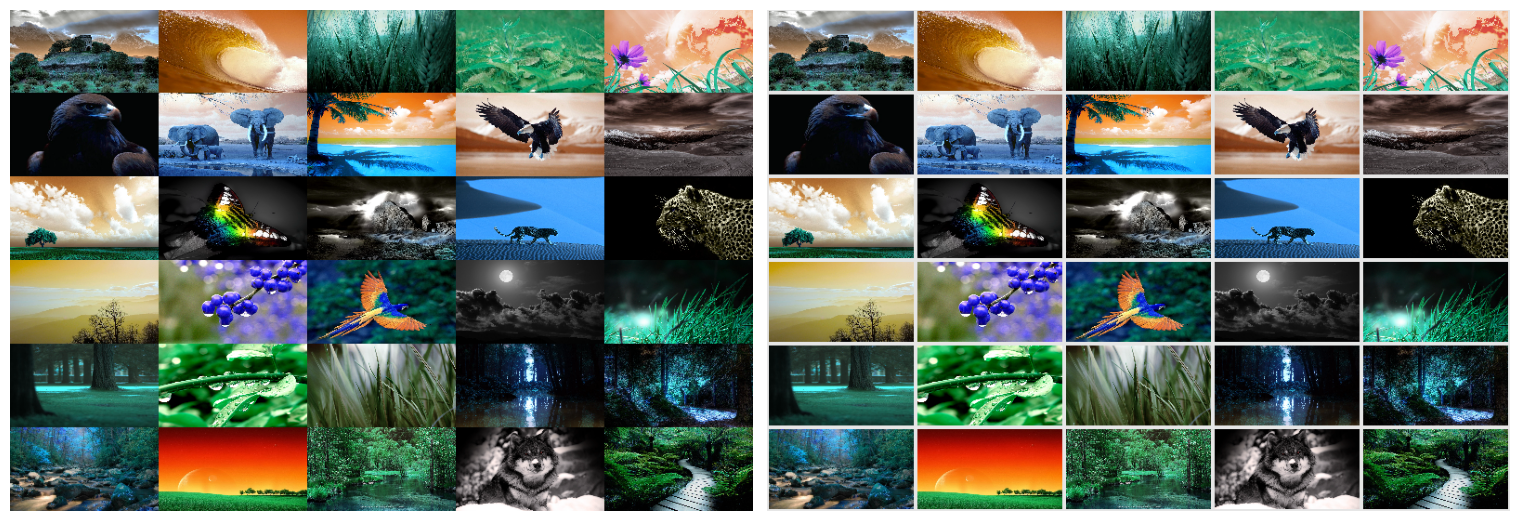

In [153]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.imshow(img2[:, :, ::-1])
ax2.imshow(img4[:, :, ::-1])
ax1.axis("off")
ax2.axis("off")
fig.subplots_adjust(0, 0, 1, 1, 0.02, 0)

## 多項式関数

多項式関数は、変数の整数乗と係数の積の和で表され、以下の数式で表すことができます：

$$f(x) = a_n x^n + a_{n-1} x^{n-1} + \cdots + a_2 x^2 + a_1 x + a_0$$

多項式関数は加算と乗算のみを含むため、計算が容易で、他の数学関数の近似値を計算するために使用されます。多項式関数の応用は非常に広く、例えば組み込みシステムでは正弦や余弦などの関数を計算するためによく使用されます。NumPyでは、多項式関数の係数は1次元配列で表すことができます。例えば、$f(x) = x^3 - 2 x + 1$は以下の配列で表すことができ、`a[0]`は最高次の係数、`a[-1]`は定数項です。$x^2$の係数は0であることに注意してください。

In [154]:
a = np.array([1.0, 0, -2, 1])

`poly1d()`を使用して係数を`poly1d`（一元多項式）オブジェクトに変換できます。このオブジェクトは関数のように呼び出すことができ、多項式関数の値を返します：

In [155]:
p = np.poly1d(a)
print(type(p))
p(np.linspace(0, 1, 5))

<class 'numpy.poly1d'>


array([ 1.      ,  0.515625,  0.125   , -0.078125,  0.      ])

`poly1d`オブジェクトに対して加減乗除の演算を行うと、対応する多項式関数の計算が行われます。例えば：

In [156]:
p + [-2, 1]  # p + np.poly1d([-2, 1]) と同じ

poly1d([ 1.,  0., -4.,  2.])

In [157]:
p * p  # 2つの3次多項式を乗算して6次多項式を得る

poly1d([ 1.,  0., -4.,  2.,  4., -4.,  1.])

In [158]:
p / [1, 1]  # 除算は商と余りの2つの多項式を返す

(poly1d([ 1., -1., -1.]), poly1d([2.]))

多項式の除算は必ずしも整除できないため、商と余りを返します。上の例では、商は$x^2 - x - 1$、余りは2です。したがって、商と除数の積に余りを加えると元の`p`に等しくなります：

In [159]:
p == np.poly1d([1.0, -1.0, -1.0]) * [1, 1] + 2

np.True_

多項式オブジェクトの`deriv()`と`integ()`メソッドは、それぞれ多項式関数の微分と積分を計算します：

In [160]:
p.deriv()

poly1d([ 3.,  0., -2.])

In [161]:
p.integ()

poly1d([ 0.25,  0.  , -1.  ,  1.  ,  0.  ])

In [162]:
p.integ().deriv() == p

np.True_

多項式関数の根は`roots()`関数を使用して計算できます：

In [163]:
r = np.roots(p)
r

array([-1.61803399,  1.        ,  0.61803399])

In [164]:
p(r)  # 根を多項式に代入して計算すると、値はほぼ0になります

array([2.33146835e-15, 4.44089210e-16, 1.11022302e-16])

`poly()`関数を使用すると、根を多項式の係数に変換できます：

In [165]:
np.poly(r)

array([ 1.00000000e+00, -7.77156117e-16, -2.00000000e+00,  1.00000000e+00])

多項式オブジェクトを使用する以外に、NumPyが提供する多項式関数を使用して、多項式係数の配列を直接操作することもできます。IPythonでは自動補完を使用して関数名を確認できます：

    >>> np.poly # Tabキーを押す
    np.poly    np.polyadd np.polydiv np.polyint np.polysub
    np.poly1d  np.polyder np.polyfit np.polymul np.polyval

In [166]:
np.polymul([1, 1], [1, 1])

array([1, 2, 1])

`polyfit()`関数は、一連のデータに対して多項式関数をフィットさせ、このデータとの誤差の二乗和が最小になる多項式の係数を見つけます。以下のプログラムは、$-\pi/2 \sim \pi/2$の区間で$sin(x)$関数に最も近い多項式の係数を計算します：

In [167]:
np.set_printoptions(suppress=True, precision=4)

x = np.linspace(-np.pi / 2, np.pi / 2, 1000)  #❶
y = np.sin(x)  #❷

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)  #❸
    error = np.abs(np.polyval(a, x) - y)  #❹
    print(f"degree {deg}: {a}")
    print(f"max error of order {deg}: {np.max(error)}")

degree 3: [-0.145  -0.      0.9887 -0.    ]
max error of order 3: 0.008946993767072198
degree 5: [ 0.0076 -0.     -0.1658  0.      0.9998 -0.    ]
max error of order 5: 0.00015740861417246066
degree 7: [-0.0002 -0.      0.0083  0.     -0.1667 -0.      1.     -0.    ]
max error of order 7: 1.5268255791900387e-06


❶まず`linspace()`を使用して$-\pi/2 \sim \pi/2$の区間を(1000-1)等分し、❷フィット対象の関数$sin(x)$の値を計算します。❸フィット対象の関数の配列を`polyfit()`に渡してフィットさせ、第3引数`deg`は多項式関数の最高次数です。`polyfit()`が返す多項式は、指定された`1000`個の点で目標関数との誤差が最小になります。`polyfit()`は多項式の係数配列を返します。❹`polyval()`を使用して多項式関数の値を計算し、目標関数との差の絶対値を計算します。

正弦関数は奇関数であるため、奇数次の多項式のみを使用してフィットさせます。プログラムの出力から、正弦関数が奇関数であるため、フィットされた多項式の係数では偶数次の係数がほぼ0に近いことがわかります。次のグラフは、各次数の多項式と正弦関数との誤差を示しています。図中のY軸は対数スケールであることに注意してください。

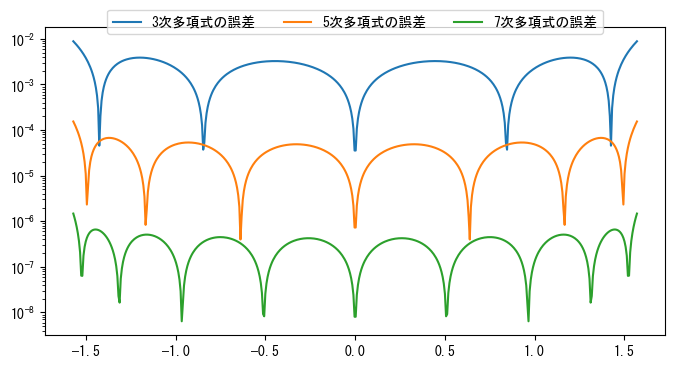

In [168]:
plt.figure(figsize=(8, 4))

x = np.linspace(-np.pi / 2, np.pi / 2, 500)
y = np.sin(x)

for deg in [3, 5, 7]:
    a = np.polyfit(x, y, deg)
    error = np.abs(np.polyval(a, x) - y)
    plt.semilogy(x, error, label=f"{deg}次多項式の誤差")
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.08), ncol=3, fancybox=True)
plt.axis("tight");

### 多項式関数クラス

`numpy.polynomial`モジュールには、`Polynomial`、`Chebyshev`、`Legendre`など、より豊富な多項式関数クラスが提供されています。これらは前述の`numpy.poly1d`とは異なり、多項式の各項の係数は次数の低い順に並んでいます。以下では、`Polynomial`クラスを使用して多項式$x^3 - 2 x + 1$を表し、$x=2$での値を計算します。

In [169]:
from numpy.polynomial import Polynomial, Chebyshev

p = Polynomial([1, -2, 0, 1])
print(p)
print(p(2.0))

1.0 - 2.0 x + 0.0 x**2 + 1.0 x**3
5.0


`Polynomial`オブジェクトは、多項式を操作するための多くのメソッドを提供しています。例えば、`deriv()`は導関数を計算します：

In [170]:
print(p.deriv())

-2.0 + 0.0 x + 3.0 x**2


チェビシェフ多項式は直交多項式列$T_i(x)$であり、$n$次多項式は複数のチェビシェフ多項式の重み付き和として表すことができます。NumPyでは、`Chebyshev`クラスを使用してチェビシェフ多項式で構成される多項式$p(x)$を表します：

$$p(x) = \sum_{i=0}^n c_i T_i(x)$$

$T_i(x)$多項式は`Chebyshev.basis(i)`で取得できます。次のグラフは0次から4次までのチェビシェフ多項式を示しています。多項式クラスの`convert()`メソッドを使用して、異なるタイプの多項式間で相互に変換できます。変換の対象タイプは`kind`パラメータで指定します。例えば、以下では$T_4(x)$を`Polynomial`クラスに変換します。結果から、$T_4(x) = 1 - 8 x^2 + 8 x^4$であることがわかります。

In [171]:
print(Chebyshev.basis(4).convert(kind=Polynomial))

1.0 + 0.0 x - 8.0 x**2 + 0.0 x**3 + 8.0 x**4


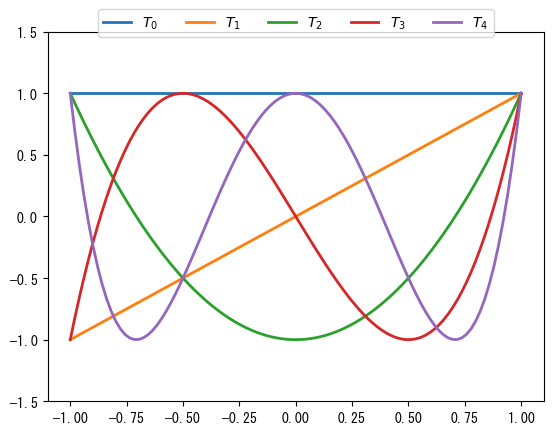

In [172]:
x = np.linspace(-1, 1, 100)
for i in range(5):
    ax = plt.plot(x, Chebyshev.basis(i)(x), lw=2, label=f"$T_{i}$")
plt.ylim(-1.5, 1.5)
plt.legend(loc="upper center", bbox_to_anchor=(0.5, 1.08), ncol=5, fancybox=True);

チェビシェフ多項式の根はチェビシェフノードと呼ばれ、多項式補間に使用できます。対応する補間多項式は、ルンゲ現象を最大限に抑制し、連続関数に対する多項式の最良の一様近似を提供します。以下では、$f(x) = \frac{1}{1+25x^2}$関数の補間を例に、チェビシェフノードとルンゲ現象を説明します。

❶$[-1, 1]$の区間で等間隔に$n$個のサンプル点を取ります。❷$n$次チェビシェフ多項式の根をサンプル点として使用します。❸2種類のサンプル点を使用して$f(x)$に対して多項式補間を行います。つまり、すべての補間点を通る多項式を計算します。次のグラフは、2種類の補間点から得られた補間多項式を示しています。左図から、等間隔補間多項式は両端で非常に大きな振動を示すことがわかります。この現象はルンゲ現象と呼ばれ、$n$が大きくなるほど振動も大きくなります。一方、右図ではチェビシェフノードを補間点として使用しており、補間多項式の振動は明らかに小さくなり、$n$が大きくなるほど振動が小さくなります。

:::{admonition} 補間とフィット
:class: note
多項式補間とは、すべての補間点を通る多項式を見つけることです。$n$次多項式は$n+1$個の係数を持つため、$n+1$個の補間点を通る$n$次多項式の係数を方程式を解いて求めることができます。`fit()`メソッドは目標点にフィットする多項式の係数を計算しますが、$n$次多項式で$n+1$個の目標点をフィットする場合、多項式はすべての目標点を通るため、その結果は多項式補間と同じになります。
:::

In [173]:
def f(x):
    return 1.0 / (1 + 25 * x**2)


n = 11
x1 = np.linspace(-1, 1, n)  #❶
x2 = Chebyshev.basis(n).roots()  #❷
xd = np.linspace(-1, 1, 200)

c1 = Chebyshev.fit(x1, f(x1), n - 1, domain=[-1, 1])  #❸
c2 = Chebyshev.fit(x2, f(x2), n - 1, domain=[-1, 1])

print("補間多項式の最大誤差：", end=" ")
print("等間隔サンプル点：", abs(c1(xd) - f(xd)).max(), end=" ")
print("チェビシェフノード：", abs(c2(xd) - f(xd)).max())

補間多項式の最大誤差： 等間隔サンプル点： 1.9155693302903332 チェビシェフノード： 0.10914982501448156


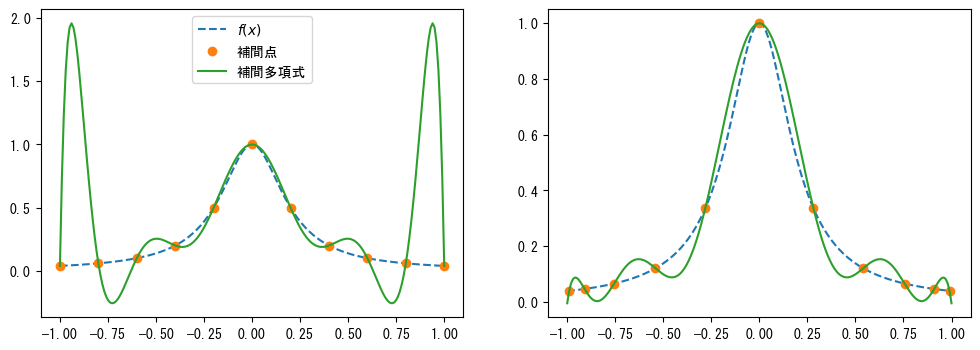

In [174]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
ax1.plot(xd, f(xd), "--", label="$f(x)$")
ax1.plot(x1, f(x1), "o", label="補間点")
ax1.plot(xd, c1(xd), label="補間多項式")

ax1.legend(loc="upper center")

ax2.plot(xd, f(xd), "--")
ax2.plot(x2, f(x2), "o")
ax2.plot(xd, c2(xd));

関数を多項式で近似する際、チェビシェフ多項式を使用した補間の誤差は、一般的な多項式よりもはるかに小さくなります。以下の例では、`g(x)`に対して100個のチェビシェフノード上で`Polynomial`と`Chebyshev`を使用して補間を行い、その結果を次のグラフに示します。`Polynomial.fit()`を使用して補間を行うと、`RankWarning: The fit may be poorly conditioned`という警告が発生し、その結果、多項式はすべての補間点を通りませんでした。

In [175]:
def g(x):
    x = (x - 1) * 5
    return np.sin(x**2) + np.sin(x) ** 2


n = 100
x = Chebyshev.basis(n).roots()
xd = np.linspace(-1, 1, 1000)

p_g = Polynomial.fit(x, g(x), n - 1, domain=[-1, 1])
c_g = Chebyshev.fit(x, g(x), n - 1, domain=[-1, 1])

print("Max Polynomial Error:", abs(g(xd) - p_g(xd)).max())
print("Max Chebyshev Error:", abs(g(xd) - c_g(xd)).max())

Max Polynomial Error: 1.1951412057532949
Max Chebyshev Error: 6.4757488260624996e-09


C:\pyenv313\envs\py\Lib\site-packages\numpy\polynomial\polynomial.py:1476: RankWarning: The fit may be poorly conditioned
  return pu._fit(polyvander, x, y, deg, rcond, full, w)


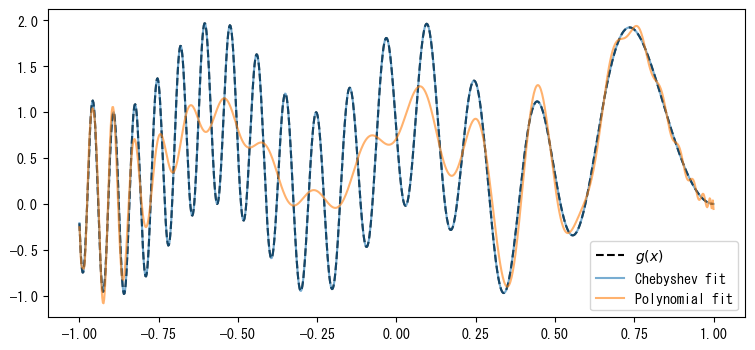

In [176]:
plt.figure(figsize=(9, 4))
plt.plot(xd, g(xd), "k--", label="$g(x)$")
plt.plot(xd, c_g(xd), alpha=0.6, label="Chebyshev fit")
plt.plot(xd, p_g(xd), alpha=0.6, label="Polynomial fit")
plt.legend(loc="best");

`trim()`メソッドを使用して多項式の次数を下げることができます。末尾の絶対値がパラメータ`tol`より小さい高次の係数を切り捨てます。以下では、`trim()`メソッドを使用して`c`の最初の68個の係数を取得し、新しい`Chebyshev`オブジェクト`c_trimed`を作成します。その最大誤差は約`0.09`に上昇します。

In [177]:
c_trimed = c_g.trim(tol=0.05)
print("degree:", c_trimed.degree())
print("error:", abs(g(xd) - c_trimed(xd)).max())

degree: 68
error: 0.09120948354583061


以下では、同じ方法で関数`h(x)`に対して19次のチェビシェフ多項式補間を行い、補間多項式`c_h`を取得します：

In [178]:
def h(x):
    x = 5 * x
    return np.exp(-(x**2) / 10)


n = 20
x = Chebyshev.basis(n).roots()
c_h = Chebyshev.fit(x, h(x), n - 1, domain=[-1, 1])

print("Max Chebyshev Error:", abs(h(xd) - c_h(xd)).max())

Max Chebyshev Error: 1.6654438939056604e-09


多項式クラスは四則演算をサポートしています。以下では、`c_g`と`c_h`を減算して`c_diff`を取得し、その`roots()`を呼び出してすべての根を計算します。その後、すべての実数根`real_roots`を見つけます。これらは`g(x)`と`h(x)`の交点のx座標です。次のグラフは、これらの関数曲線と補間多項式を使用して計算された交点を示しています：

In [179]:
c_diff = c_g - c_h
roots = c_diff.roots()
real_roots = roots[roots.imag == 0].real
print(np.allclose(c_diff(real_roots), 0))

True


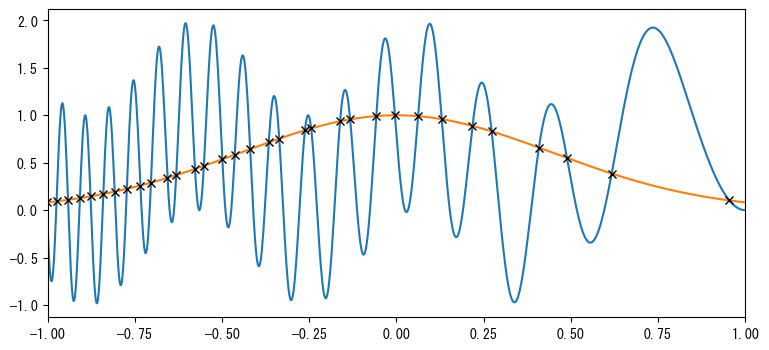

In [180]:
plt.figure(figsize=(9, 4))
plt.plot(xd, g(xd))
plt.plot(xd, h(xd))
plt.plot(real_roots, h(real_roots), "kx", markeredgewidth=1)
plt.xlim(-1, 1);

チェビシェフ多項式は区間$[−1,1]$において直交多項式であるため、その区間内でのみ目的関数を正しく補間することができます。任意の領域の目的関数を補間するためには、独立変数の区間をスケーリングおよび平行移動する必要があります。`domain`パラメータを使用して、フィットポイントの区間を指定することができます。以下の例では、`g2(x)`を区間$[-10, 0]$内でチェビシェフ多項式を使用して補間します。❶目的の区間内のチェビシェフノードを生成するために、`basis()`メソッドを使用して$T_n(x)$を作成する際に、`domain`パラメータを使用して現在の区間を指定します。❷`fit()`メソッドを呼び出してフィットを行う際に、`domain`パラメータを使用して同じ区間を指定します。❸最後に、フィットによって得られた`c_g2`多項式が$[-10, 0]$内で目的関数との最大誤差を出力します。

In [181]:
def g2(x):
    return np.sin(x**2) + np.sin(x) ** 2


n = 100
x = Chebyshev.basis(n, domain=[-10, 0]).roots()  #❶
xd = np.linspace(-10, 0, 1000)

c_g2 = Chebyshev.fit(x, g2(x), n - 1, domain=[-10, 0])  #❷

print("Max Chebyshev Error:", abs(g2(xd) - c_g2(xd)).max())  #❸

Max Chebyshev Error: 6.47574660561645e-09


## 各種の積演算

この節では以下の関数を紹介します：

| 関数名  | 機能  | 関数名  | 機能  |
|:--|:--|:--|:--|
| `dot`  | 行列積  | `inner`  | 内積  |
| `outer`  | 外積  | `tensordot` | テンソル積  |

行列の積は`dot()`を使用して計算できます。二次元配列の場合、行列積を計算し、一次元配列の場合、内積を計算します。一次元配列を行ベクトルまたは列ベクトルとして行列演算を行う必要がある場合、まず一次元配列を二次元配列に変換します：

In [182]:
a = np.array([1, 2, 3])
%C a[:, None]; a[None, :]

a[:, None]   a[None, :]
----------  -----------
[[1],       [[1, 2, 3]]
 [2],                  
 [3]]                  


多次元配列の場合、`dot()`の一般的な計算式は以下の通りです。つまり、結果の配列の各要素は、配列`a`の最後の軸上のすべての要素と配列`b`の最後から二番目の軸上のすべての要素の積の和です：
    
    dot(a, b)[i,j,k,m] = sum(a[i,j,:] * b[k,:,m])
    
以下に、2つの3次元配列の積を用いて`dot()`の計算結果をデモンストレーションします。まず、2つの3次元配列を作成します。これらの配列の最後の2つの軸は行列積の条件を満たしています：

In [183]:
a = np.arange(12).reshape(2, 3, 2)
b = np.arange(12, 24).reshape(2, 2, 3)
c = np.dot(a, b)
c.shape

(2, 3, 2, 3)

`c`は配列`a`と`b`の複数の部分行列の積です。配列`a`を形状が`(3,2)`の2つの行列と見なし、配列`b`を形状が`(2,3)`の2つの行列と見なすことができます。`a`の2つの行列はそれぞれ`b`の2つの行列と行列積を行い、配列`c`が得られます。`c[i, :, j, :]`は`a`の`i`番目の行列と`b`の`j`番目の行列の積です。

In [185]:
for i, j in np.ndindex(2, 2):
    assert np.all(c[i, :, j, :] == np.dot(a[i], b[j]))

2つの一次元配列の場合、`inner()`と`dot()`は同じで、2つの配列の対応するインデックスの要素の積の和を計算します。多次元配列の場合、結果の配列の各要素は、配列`a`と`b`の最後の軸の内積です。したがって、配列`a`と`b`の最後の軸の長さは同じでなければなりません：

    inner(a, b)[i,j,k,m] = sum(a[i,j,:]*b[k,m,:])
    
以下は`inner()`のデモンストレーションです：

In [186]:
a = np.arange(12).reshape(2, 3, 2)
b = np.arange(12, 24).reshape(2, 3, 2)
c = np.inner(a, b)
c.shape

(2, 3, 2, 3)

In [187]:
for i, j, k, l in np.ndindex(2, 3, 2, 3):
    assert c[i, j, k, l] == np.inner(a[i, j], b[k, l])

`outer()`は一次元配列のみを計算します。多次元配列が渡された場合、まずその配列を一次元配列に平坦化してから計算を行います。列ベクトルと行ベクトルの行列積を計算します：

In [188]:
a = np.array([1, 2, 3])
b = np.array([4, 5, 6, 7])
%C np.outer(a, b); np.dot(a[:, None], b[None, :])

  np.outer(a, b)    np.dot(a[:, None], b[None, :])
------------------  ------------------------------
[[ 4,  5,  6,  7],  [[ 4,  5,  6,  7],            
 [ 8, 10, 12, 14],   [ 8, 10, 12, 14],            
 [12, 15, 18, 21]]   [12, 15, 18, 21]]            


`tensordot()`は2つの多次元配列`a`と`b`の指定された軸上の対応する要素を乗算して和を求めます。これは最も一般的な積演算関数です。以下にいくつかの例を用いてその使い方を段階的に紹介します。以下に2つの行列の積を計算します：❶`axes`パラメータには2つの要素があり、最初の要素は`a`の軸を、2番目の要素は`b`の軸を表します。これらの軸上の対応する要素を乗算して和を求めます。❷`axes`は整数でもかまいません。これは`a`の後ろの`axes`個の軸と`b`の前の`axes`軸を乗算して和を求めることを意味します。積和以外の軸はそのまま保持されます。

In [189]:
a = np.random.rand(3, 4)
b = np.random.rand(4, 5)

c1 = np.tensordot(a, b, axes=[[1], [0]])  #❶
c2 = np.tensordot(a, b, axes=1)  #❷
c3 = np.dot(a, b)
assert np.allclose(c1, c3)
assert np.allclose(c2, c3)

多次元配列の`dot()`積は、`tensordot(a, b, axes=[[-1], [-2]])`で表すことができます。つまり、`a`の最後の軸と`b`の最後から二番目の軸の積和を求めます：

In [191]:
a = np.arange(12).reshape(2, 3, 2)
b = np.arange(12, 24).reshape(2, 2, 3)
c1 = np.tensordot(a, b, axes=[[-1], [-2]])
c2 = np.dot(a, b)
assert np.all(c1 == c2)

以下の例では、`a`の第1、第2軸と`b`の第1、第0軸の積和を求めます。したがって、`c`の各要素は以下の式に従って計算されます。`b`の対応する`axes`の軸が逆順であるため、転置操作が必要であることに注意してください：

    c[i, j, k, l] = np.sum(a[i, :, :, j] * b[:, :, k, l].T)

In [192]:
a = np.random.rand(4, 5, 6, 7)
b = np.random.rand(6, 5, 2, 3)
c = np.tensordot(a, b, axes=[[1, 2], [1, 0]])

for i, j, k, l in np.ndindex(4, 7, 2, 3):
    assert np.allclose(c[i, j, k, l], np.sum(a[i, :, :, j] * b[:, :, k, l].T))

c.shape

(4, 7, 2, 3)

## 汎用ufunc関数

NumPy 1.8から正式に汎用ufunc関数（generalized ufunc、以下gufunc）がサポートされました。gufuncはufuncの拡張であり、ufuncとは単一の数値に対する演算をブロードキャストして配列のすべての要素に適用するものです。gufuncは、単一の行列に対する演算をブロードキャストして配列全体に適用します。例えば、`numpy.linalg.inv()`は逆行列を求めるgufunc関数です。そのドキュメントでは、入力と出力の配列の形状を次のように説明しています：

```
ainv = inv(a)
a : (..., M, M)
ainv : (..., M, M)
```
    
入力配列`a`の形状には「`...`」が含まれており、これは0から任意の数の軸を表します。これが空の場合、単一の行列の逆行列を求めることになり、gufunc関数はこれらの軸に対してブロードキャスト演算を行います。最後の2つの軸の長さはMで、任意のサイズの正方行列を表します。

:::{tip}
NumPyの線形代数モジュール`linalg`で提供される関数の多くは汎用ufunc関数です。SciPyにも線形代数モジュール`linalg`が提供されていますが、その中の関数は一般関数であり、単一の行列に対してのみ計算を行います。線形代数関数ライブラリの使い方については、次の章で詳しく説明します。
:::

出力配列`ainv`では、逆行列の形状が元の行列と同じであるため、`ainv`の最後の2つの軸の形状も`(M,M)`です。「`...`」はブロードキャスト演算後の形状を表し、行列の逆行列は単一の行列に対してのみ演算を行うため、「`...`」の形状は`a`の「`...`」の形状と同じです。

以下の例では、`a`の形状は`(10, 20, 3, 3)`で、`(10, 20)`が「`...`」に対応し、`3`が`M`に対応します。`inv()`はブロードキャスト演算を行い、$10 \times 20$個の形状が`(3, 3)`の行列の逆行列を求めます。結果として得られる`ainv`の形状は`a`と同じで、`(10, 20, 3, 3)`です。

In [193]:
a = np.random.rand(10, 20, 3, 3)
ainv = np.linalg.inv(a)
ainv.shape

(10, 20, 3, 3)

以下のプログラムは、第`i`行、第`j`列の行列とその逆行列の積を検証します。これは3次の単位行列にほぼ等しくなるはずです：

In [194]:
i, j = 3, 4
np.allclose(np.dot(a[i, j], ainv[i, j]), np.eye(3))

True

`numpy.linalg.det()`は行列の行列式を計算するgufunc関数です。その入力と出力の形状は次のとおりです：

```
adet = det(a)
a : (..., M, M)
adet : (...)
```
    
行列の行列式は$M \times M$の行列をスカラーにマッピングするため、出力`adet`の形状には「`...`」のみが含まれます。

In [195]:
adet = np.linalg.det(a)
adet.shape

(10, 20)

以下では、複数の二次関数のデータフィッティングを例として、gufunc関数を使用して計算効率を向上させる方法を紹介します。まず、ランダム関数を使用してテストデータ`x`と`y`を作成します。これらの配列の形状は`(n, 10)`です。各行のデータ（`x[i]`と`y[i]`）は曲線フィッティングのデータセットを構成し、それらの関係は$y = \beta_2 + \beta_1 x + \beta_0 x^2$です。各データペアに対応する係数$\beta$を計算する必要があります。

In [196]:
n = 10000
np.random.seed(0)
beta = np.random.rand(n, 3)
x = np.random.rand(n, 10)
y = beta[:, 2, None] + x * beta[:, 1, None] + x**2 * beta[:, 0, None]

前述の`numpy.polyfit()`を使用すると、このタスクを簡単に実行できます。以下のプログラムは、第42組の実際の係数とフィッティング結果を出力します。

In [197]:
print(beta[42])
print(np.polyfit(x[42], y[42], 2))

[0.0192 0.3016 0.6602]
[0.0192 0.3016 0.6602]


`numpy.polyfit()`をn回呼び出すだけで必要な結果を得ることができますが、計算速度がやや遅いです：

In [198]:
%time beta2 = np.vstack([np.polyfit(x[i], y[i], 2) for i in range(n)])

CPU times: total: 906 ms
Wall time: 918 ms


In [199]:
np.allclose(beta, beta2)

True

`numpy.polyfit()`の内部では、実際には最小二乗法関数`numpy.linalg.lstsq()`を呼び出して多項式フィッティングを行っています。`lstsq()`を直接呼び出して係数を計算することもできます：

In [200]:
xx = np.column_stack(([x[42] ** 2, x[42], np.ones_like(x[42])]))
print(np.linalg.lstsq(xx, y[42], rcond=-1)[0])

[0.0192 0.3016 0.6602]


しかし、残念ながら現在の`numpy.linalg.lstsq()`はgufunc関数ではないため、すべてのデータセットのフィッティング係数を直接計算することはできません。しかし、`numpy.linalg`の線形方程式を解く関数`solve()`はgufunc関数です。最小二乗法の公式によると：

$$\mathbf{\hat{\beta}} =( \mathbf{X}^{T} \mathbf{X})^{-1} \mathbf{X}^{T}\mathbf{y}$$

$\mathbf{X}^{T} \mathbf{X}$と$\mathbf{X}^{T} \mathbf{y}$を求めるだけで、`numpy.linalg.solve()`を使用して$\mathbf{\hat{\beta}} = solve(\mathbf{X}^{T} \mathbf{X}, \mathbf{X}^{T}\mathbf{y})$を計算できます。この演算を実現するためには、行列積を計算するgufunc関数も必要です。しかし、`dot()`はgufunc関数ではありません。なぜなら、ブロードキャストルールに従わないからです。NumPyには行列積を計算するgufunc関数として、`matmul()`が提供されています。以下のプログラムでは、これと`solve()`を使用して高速な多項式フィッティング演算を実現します。これに必要な時間は`polyfit()`バージョンの約50分の1です。

In [216]:
%%time
X = np.dstack([x**2, x, np.ones_like(x)])
Xt = X.swapaxes(-1, -2)

A = np.matmul(Xt, X)
b = np.matmul(Xt, y[..., None])

beta3 = np.linalg.solve(A, b).squeeze()

print(np.allclose(beta3, beta2))

True
CPU times: total: 15.6 ms
Wall time: 12.4 ms


上記の演算では、`X`の形状は`(10000, 10, 3)`、`Xt`の形状は`(10000, 3, 10)`です。`matmul()`の各パラメータと戻り値の形状は次のとおりです：

```
c = matmul(a, b)
a : (..., M, N)
b : (..., N, K)
c : (..., M, K)
```

`matmul()`を呼び出して`Xt`と`X`の各行列ペアの積を計算し、結果`A`の形状は`(10000, 3, 3)`です。$\mathbf{X}^{T}\mathbf{y}$を計算するために、`y[..., None]`を使用して`y`を形状`(10000, 10, 1)`の配列に変換します。`matmul(Xt, y[..., None])`の結果の形状は`(10000, 3, 1)`です。

`solve()`のパラメータ`b`は2つの形状をサポートしており、本件のケースの形状は次のとおりです：

```
x = solve(a, b)
a : (..., M, M)
b : (..., M, K)
x : (..., M, K)
```
    
したがって、`solve()`の戻り値の形状は`(10000, 3, 1)`です。`squeeze()`を呼び出して長さ1の軸を削除します。これにより、`beta3`の形状は`(10000, 3)`になります。

前の例では、最も単純なブロードキャストルールを使用しました。実際、gufunc関数はすべてのufunc関数のブロードキャストルールをサポートしています。したがって、形状がそれぞれ`(a, m, n)`と`(b, 1, n, k)`の2つの配列を`matmul()`で乗算すると、結果の配列の形状は`(b, a, m, k)`になります。以下に、gufunc関数のブロードキャスト演算を使用した例を示します：

二次元平面上の回転行列は次のとおりです：

$$ M(\theta) = \begin{bmatrix}      \cos{\theta} & -\sin{\theta} \\     \sin{\theta} & \cos{\theta}    \end{bmatrix} $$

これは、平面上の点の座標を原点を中心に$\theta$回転させます。形状が`(N, 2)`の行列$P$は、平面上の`N`個の点の座標を表します。行列積$P \cdot M(\theta)$は、これらのN個の点を座標原点を中心に$\theta$回転させた後の座標を表します。以下のプログラムでは、`matmul()`を使用して3つの曲線上の座標点をそれぞれ4つの角度で回転させ、12の曲線を生成します。

`matmul()`を呼び出す際の2つのパラメータ配列の形状はそれぞれ`(3, 100, 2)`と`(4, 1, 2, 2)`で、ブロードキャスト軸の形状はそれぞれ`(3,)`と`(4, 1)`、演算軸の形状はそれぞれ`(100, 2)`と`(2, 2)`です。ブロードキャスト軸をブロードキャストした後の形状は`(4, 3)`で、演算軸を行列積した後の形状は`(100, 2)`です。したがって、結果`rpoints`の形状は`(4, 3, 100, 2)`です。

In [218]:
M = np.array(
    [
        [[np.cos(t), -np.sin(t)], [np.sin(t), np.cos(t)]]
        for t in np.linspace(0, np.pi, 4, endpoint=False)
    ]
)

x = np.linspace(-1, 1, 100)
points = np.array((np.c_[x, x], np.c_[x, x**3], np.c_[x**3, x]))
rpoints = np.matmul(points, M[:, None, ...])

print(points.shape, M.shape, rpoints.shape)

(3, 100, 2) (4, 2, 2) (4, 3, 100, 2)


これら12の曲線をプロットした結果は、次のグラフに示されています：

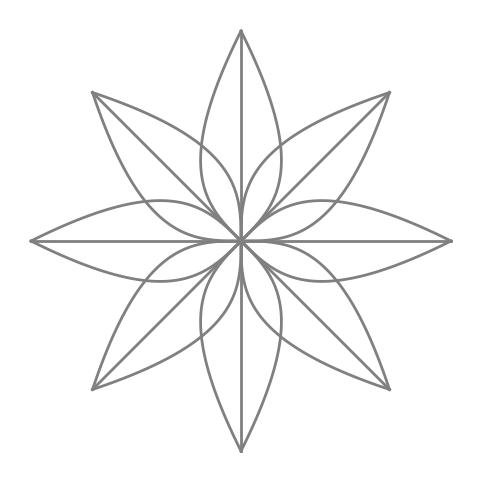

In [219]:
plt.figure(figsize=(6, 6))
for t in rpoints.reshape(-1, 100, 2):
    plt.plot(t[:, 0], t[:, 1], color="gray", lw=2)
ax = plt.gca()
ax.set_aspect("equal")
ax.axis("off");